In [20]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [21]:
df = utils.import_attrition_data()
df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# AT25

In [22]:
df["country"] = pd.factorize(df["country"])[0]
df["gender"] = pd.factorize(df["gender"])[0]
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,0,1,39,5,0.00,2,1,0,96270.64,0
10002,516,0,1,35,10,57369.61,1,1,1,101699.77,0
10003,709,0,0,36,7,0.00,1,0,1,42085.58,1
10004,772,2,1,42,3,75075.31,2,1,0,92888.52,1


# AT26

In [23]:
feature_columns = [
    "credit_score",
    "country",
    "gender",
    "age",
    "tenure",
    "balance",
    "products_number",
    "credit_card",
    "active_member",
    "estimated_salary"
]

target_value = "churn"

X = df[feature_columns]
y = df[target_value]

# AT27

In [24]:
y.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

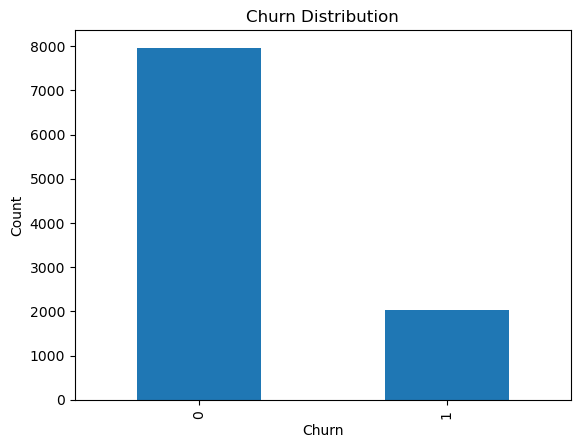

In [25]:
y.value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

# AT28

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


# AT29

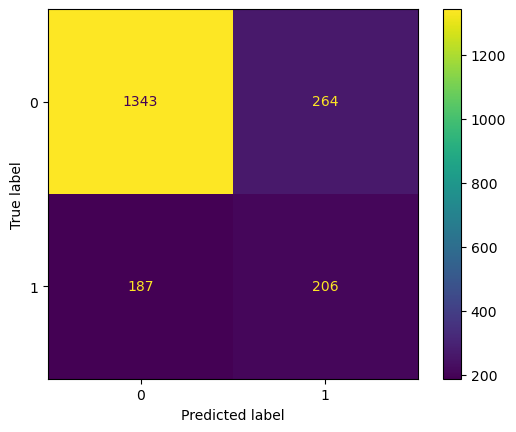

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()